## Phase 5 Capstone Project: Jumia Phone Price Prediction: Optimizing Retail Strategies through Data Analytics

![Project Image](Black_Friday.jpg)

# 1.0 Business Understanding

## 1.1 Background
The e-commerce landscape in Africa has witnessed significant growth in recent years with platforms like Jumia leading the charge. As one of the continent's largest online marketplaces, Jumia hosts over 100,000 retailers, all vying for consumer attention in a highly competitive environment. The dynamics of pricing strategy have become increasingly complex, particularly in categories like electronics where demand is sensitive to pricing fluctuations. Retailers must navigate not only the prices set by their competitors but also various factors such as consumer demand, seasonal sales and promotional events.

As the November Black Friday sales event approaches, the pressure intensifies for retailers to optimize their pricing strategies to capture market share while ensuring profitability. However, the traditional methods of price evaluation can be cumbersome and time-consuming, often relying on manual research or outdated tools. This inefficiency can result in missed opportunities for sales and reduced competitiveness.

## 1.2 Problem Statement
Retailers on Jumia are struggling to establish effective pricing strategies due to intense competition and rapidly changing market conditions. Current pricing evaluation methods are slow and lack necessary data-driven insights, which is particularly pressing with Black Friday approaching. To tackle this challenge, we aim to create a predictive pricing model using historical sales data, competitor pricing, and market trends. This model will automate pricing evaluations, allowing retailers to efficiently set competitive prices and improve their performance on the Jumia platform during peak sales periods. Ultimately, the project seeks to equip retailers with essential tools for success in the competitive e-commerce landscape.

## 1.3 Objectives
>- Build a predictive model that uses historical sales data, competitor pricing and market trends to forecast optimal   pricing for smartphone products during high-traffic sales events such as Black Friday.
>- Analyze historical sales and pricing data to identify key factors that drive consumer purchasing decisions and pricing trends.


# 2.0 Data Understanding
The data for this project was scraped on October 31, 2024, from the Jumia Kenya e-commerce platform, specifically in the smartphones category and organized by popularity from the first to the last page. This process yielded a total of 12,000 listed devices. For a detailed review of the complete code used in the web scraping process, please refer to the following link: [Web Scraping Script](Scrapped_data.ipynb) The packages utilized in this project included Beautiful Soup and Pandas. The extracted [Data](https://github.com/N-kioko/Smartphones_Price_Prediction_and_Discount_Analysis_Project/blob/main/Data/jumia_phones.csv) was saved in CSV format on our local machine as `jumia_phones.csv`, and consists of the following features:

* **Name:** This describes the brand and the features of the phone.
* **Price:** This describes the current price the phone retails at.
* **Old Price:** This describes the previous price of the phone.
* **Discount:** The % discount calculated
* **Rating:** The buyers explicit rating of the product and service.
* **Number of Reviews:** The number of reviews from possible buyers.
* **Search Ranking:** The page and position of the product in terms of listing and popularity.

The Name column contains unstructured text, combining brand names and product specifications (e.g., “Samsung Galaxy A12, 5000mAh, 128GB ROM, 6GB RAM”). To transform these into separate, structured attributes, we shall use Regex as it allows for consistent pattern matching, enabling the extraction of information such as battery capacity (e.g. numbers followed by "mAh") and storage (e.g. "GB" or "MB"), making data more structured and accessible for analysis.

Data Limitation:

* **Dynamic Pricing:** Prices on e-commerce platforms fluctuate frequently. Therefore, the scraped prices reflect only the prices at the time of scraping and may not represent current or future values.
* **Incomplete or Inconsistent Data:** Due to the variety of phone models and brands, some listings may lack uniform information (e.g., missing battery details or memory specifications), which could lead to variability in the parsed features.
* **Unverified Ratings and Reviews:** Ratings and reviews might be biased or manipulated, affecting any insights or model predictions derived from them.
* **Potential Duplicate Listings:** Duplicate or near-duplicate entries may exist if the same model is listed by multiple sellers, which could influence popularity and ranking statistics.

In [822]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [823]:
# Loading the dataset
df = pd.read_csv('jumia_phones.csv')
# Checking the first few rows of the dataset
df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,"Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ...","KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,"Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...","KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [824]:
# Concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               12000 non-null  object
 1   Price              12000 non-null  object
 2   Old Price          8101 non-null   object
 3   Discount           8101 non-null   object
 4   Rating             11700 non-null  object
 5   Number of Reviews  11700 non-null  object
 6   Search Ranking     12000 non-null  object
dtypes: object(7)
memory usage: 656.4+ KB


In [825]:
# Summary statistics for numerical columns
df.describe()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
count,12000,12000,8101,8101,11700,11700,12000
unique,40,34,19,22,12,38,12000
top,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 10,000","KSh 29,999",45%,4.3 out of 5,4.6 out of 5(9),"Page 1, Rank 1"
freq,300,1500,1200,900,1800,600,1


### Observations

* Our DataFrame contains seven columns labeled '**Name**', '**Price**', '**Old Price**', '**Discount**', '**Rating**', '**Number of Reviews**' and '**Search Ranking**'
* Each column has a count of 12,000 entries except for Old Price, Discount, Rating and Number of Reviews which have 8,101, 8,101, 11,700 and 11,700 entries respectively. This suggests that there may be missing values in these columns.
* **Most Frequently Listed Product:** XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM) appears 300 times, indicating high popularity among sellers or consumers.
* **Common Price Point:** The most frequent price is KSh 10,000, suggesting a prevalent pricing strategy.
* **Common Discount Rate:** A discount rate of 45% is the most common, likely reflecting promotional tactics.
* **Frequent Rating:** The average rating is "4.3 out of 5," showing that products are generally well-reviewed.
* **Highest Rating Based on Few Reviews** The highest rating is "4.6 out of 5" based on only 9 reviews, indicating a small sample size.
* **Top Search Ranking:** The highest visibility is "Page 1, Rank 1," showcasing a product's prominence in search results.
* **Dominant Trends:** The frequency of certain products and prices suggests prevailing trends in consumer preferences and seller strategies.

# 3.0 Data Preparation

## 3.1 Data Cleaning

This section focuses on preparing the data for exploratory data analysis (EDA). We intend to:

* Efficiently extract and organize key product attributes/features from the product names column.
* Create a structured DataFrame containing essential details about each phone.
* Extract relevant numerical information from the '**Rating**', '**Number of Reviews**', and '**Search Ranking**' columns of the DataFrame for further analysis.

In [826]:
# Have the Name column in the variable name `product_column`
product_column = 'Name'  

# Define regex pattern to extract brand
pattern_brand = r"(?P<brand>[\w\s]+)(?=\+|,\s|\s|$)"

# Function to extract brand
def extract_brand(name):
    match = re.search(pattern_brand, name)
    return match.group('brand').strip() if match else None

# Extract brand
brand_df = df[product_column].apply(extract_brand).rename('Brand')

# Convert to lowercase and then title case for uniformity
brand_df = brand_df.str.lower().str.title()

# Define regex pattern to extract screen size
screen_size_pattern = r"(?P<screen_size>\d+(\.\d+)?)(?=['\"]{1,2})"

# Function to extract screen size
def extract_screen_size(name):
    match = re.search(screen_size_pattern, name)
    return match.group('screen_size').strip() if match else None

# Extract screen size
size_df = df[product_column].apply(extract_screen_size).rename('Screen Size')

# Define regex pattern to extract RAM
ram_pattern = r"\b(?P<RAM>\d\s?GB)\b"

# Function to extract RAM
def extract_ram(name):
    match = re.search(ram_pattern, name)
    return match.group('RAM').strip() if match else None

# Extract RAM
ram_df = df[product_column].apply(extract_ram).rename('RAM')

# Define regex pattern to extract ROM
rom_pattern = r"\b(?P<ROM>\d{2,}\s?GB)\b"

# Function to extract ROM
def extract_rom(name):
    match = re.search(rom_pattern, name)
    return match.group('ROM').strip() if match else None

# Extract ROM
rom_df = df[product_column].apply(extract_rom).rename('ROM')

# Define regex pattern to extract Color
color_pattern = r"[,-]\s*(?P<Color>([A-Z][a-z]+(?:\s[A-Z][a-z]+)*))\s*(?:\+.*)?(?=\s*\(|$)"

# Function to extract Color
def extract_color(name):
    match = re.search(color_pattern, name)
    return match.group('Color').strip() if match else None

# Extract Color
color_df = df[product_column].apply(extract_color).rename('Color')

# Function to extract features like Warranty
def extract_feature(df, column_name, pattern, feature_name):
    return df[column_name].apply(lambda x: re.search(pattern, x).group(1) if re.search(pattern, x) else None).rename(feature_name)

# Define regex patterns for extracting features
patterns = {
    'Warranty': r"(\d+)\s*(?:YR|WRTY)"  
}
# Extract features using the defined patterns
extracted_features = {
    name: extract_feature(df, product_column, pattern, name)
    for name, pattern in patterns.items()
}
# Special handling for Warranty
extracted_features['Warranty'] = extracted_features['Warranty'].apply(
    lambda x: 2 if x == '2' else (1 if x == '1' else 0)
)
# Function to extract Camera
def extract_camera(name):
    camera_pattern = r'(\d+MP)'
    match = re.search(camera_pattern, name)
    return match.group(1).strip() if match else None

# Extract Camera
camera_df = df[product_column].apply(extract_camera).rename('Camera')

# Function to extract Battery
def extract_battery(name):
    battery_pattern = r'(\d{4}mAh)'
    match = re.search(battery_pattern, name)
    return match.group(1).strip() if match else None

# Extract Battery
battery_df = df[product_column].apply(extract_battery).rename('Battery Power')

# Function to extract Number of SIMs
def extract_sim(name):
    # Regex to check for any form of "dual" (case-insensitive) in the name
    if re.search(r'\b(dual|DUAL)\b', name, re.IGNORECASE):
        return 2  # Return 2 SIMs if "dual" is found
    
    # If "dual" is not found, return 1 SIM by default
    return 1
# Extract SIMs
sim_df = df[product_column].apply(extract_sim).rename('Number of SIMs')

# Add 'Number of SIMs' to the extracted_features dictionary
extracted_features['Number of SIMs'] = sim_df

# Special handling for Number of SIMs
extracted_features['sim_cards'] = extracted_features['Number of SIMs'].apply(
    lambda x: 2 if x and 'Dual' in str(x) else 1
)
# Concatenate extracted features with the original DataFrame (excluding the product column)
extracted_features_df = pd.concat(
    [brand_df, size_df, ram_df, rom_df, color_df, extracted_features['Warranty'], camera_df, battery_df, sim_df],
    axis=1
)
# Concatenate with the original DataFrame, excluding the product column
final_df = pd.concat(
    [extracted_features_df, df.drop(columns=[product_column])],
    axis=1
)
# Display the final DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,None,5000mAh,2,"KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,50MP,5000mAh,1,"KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,Itel S23,6.6,4GB,128GB,Mystery White,1,50MP,5000mAh,2,"KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,0,50MP,5000mAh,2,"KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,Itel S23,6.6,4GB,128GB,Starry Black,0,50MP,5000mAh,2,"KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [827]:
# Clean the Rating column
final_df['Rating'] = final_df['Rating'].str.extract(r'(\d+\.\d+)')[0]

# Clean the Number of Reviews column to extract the number in parentheses
final_df['Number of Reviews'] = final_df['Number of Reviews'].str.extract(r'\((\d+)\)')[0]

# Define regex pattern to extract page and rank
pattern = r'Page (?P<Page>\d+), Rank (?P<Rank>\d+)'

# Extract page and rank into new columns
final_df[['Page', 'Rank']] = final_df['Search Ranking'].str.extract(pattern)

# Display the cleaned DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,None,5000mAh,2,"KSh 11,000",NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,50MP,5000mAh,1,"KSh 12,925","KSh 15,000",14%,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.6,4GB,128GB,Mystery White,1,50MP,5000mAh,2,"KSh 10,000",NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,0,50MP,5000mAh,2,"KSh 14,000",NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.6,4GB,128GB,Starry Black,0,50MP,5000mAh,2,"KSh 10,000",NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


In [828]:
# Converting data types, handling null values, and checking for duplicates:

# Convert Screen Size and Rating to float
final_df['Screen Size'] = final_df['Screen Size'].astype(float)
final_df['Rating'] = final_df['Rating'].astype(float)

# Convert RAM and ROM to integer
final_df['RAM'] = final_df['RAM'].str.replace('GB', '').astype(int)
final_df['ROM'] = final_df['ROM'].str.replace('GB', '').astype(int)

# Convert Page and Rank to integer
final_df['Page'] = final_df['Page'].astype(int)
final_df['Rank'] = final_df['Rank'].astype(int)

# Convert Price and Old Price to float
final_df['Price'] = final_df['Price'].str.replace(r'[^\d]', '', regex=True).astype(float)
final_df['Old Price'] = final_df['Old Price'].str.replace(r'[^\d]', '', regex=True).astype(float)

# Convert Discount to float
final_df['Discount'] = final_df['Discount'].str.replace('%', '').astype(float)

# Convert the Number of Reviews to integers, filling null values with 0
final_df['Number of Reviews'] = final_df['Number of Reviews'].fillna(0).astype(float).astype(int)

# View the first 6 rows of the modified dataset
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Camera,Battery Power,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3,64,Midnight Black,2,None,5000mAh,2,11000.0,NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.60,4,128,Gravity Black,1,50MP,5000mAh,1,12925.0,15000.0,14.0,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.60,4,128,Mystery White,1,50MP,5000mAh,2,10000.0,NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.70,4,128,Black,0,50MP,5000mAh,2,14000.0,NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.60,4,128,Starry Black,0,50MP,5000mAh,2,10000.0,NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


In [829]:
# Inspect the shape of the modified DataFrame
final_df_shape = final_df.shape
final_df_shape

(12000, 17)

In [830]:
# Display information about the DataFrame to confirm its structure and data types
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              12000 non-null  object 
 1   Screen Size        11100 non-null  float64
 2   RAM                12000 non-null  int32  
 3   ROM                12000 non-null  int32  
 4   Color              9600 non-null   object 
 5   Warranty           12000 non-null  int64  
 6   Camera             8700 non-null   object 
 7   Battery Power      9300 non-null   object 
 8   Number of SIMs     12000 non-null  int64  
 9   Price              12000 non-null  float64
 10  Old Price          8101 non-null   float64
 11  Discount           8101 non-null   float64
 12  Rating             10200 non-null  float64
 13  Number of Reviews  12000 non-null  int32  
 14  Search Ranking     12000 non-null  object 
 15  Page               12000 non-null  int32  
 16  Rank               120

In [831]:
# Now that the conversions are complete, let's review the statistical summary of the DataFrame
final_df_stats = final_df.describe()
final_df_stats

,Screen Size,RAM,ROM,Warranty,Number of SIMs,Price,Old Price,Discount,Rating,Number of Reviews,Page,Rank
count,11100.000000,12000.000000,12000.000000,12000.000,12000.0000,12000.000000,8101.000000,8101.000000,10200.000000,12000.000000,12000.000000,12000.000000
mean,6.576216,4.500000,128.000000,0.375,1.7750,13735.783250,21325.503024,34.257252,4.297059,79.450000,150.500000,20.500000
std,0.389371,1.870907,61.970316,0.696,0.4176,4733.589395,7141.805533,12.445535,0.292554,89.613708,86.605668,11.543877
min,5.000000,1.000000,32.000000,0.000,1.0000,4700.000000,7499.000000,3.000000,3.500000,0.000000,1.000000,1.000000
25%,6.600000,4.000000,64.000000,0.000,2.0000,10000.000000,14999.000000,24.000000,4.100000,12.500000,75.750000,10.750000
50%,6.600000,4.000000,128.000000,0.000,2.0000,13399.000000,20000.000000,37.000000,4.300000,46.500000,150.500000,20.500000
75%,6.710000,4.000000,128.000000,0.250,2.0000,15661.750000,29999.000000,44.000000,4.500000,117.750000,225.250000,30.250000
max,6.880000,8.000000,256.000000,2.000,2.0000,24999.000000,35000.000000,50.000000,4.800000,420.000000,300.000000,40.000000


In [832]:
# Checking for null values
null_values = final_df.isnull().sum()
null_values

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                2400
Warranty                0
Camera               3300
Battery Power        2700
Number of SIMs          0
Price                   0
Old Price            3899
Discount             3899
Rating               1800
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

### Observations
* The most notable missing data includes the **Old Price**, and **Discount** columns.
* Moderate Missing Values: **Screen Size**, **Color**, **Camera**, **Battery Power**, and **Rating** have missing values, but they are not as extensive as the above columns.
* No Missing Values: Columns such as **Brand**, **RAM**, **ROM**, **Price**, **Number of Reviews**, **Search Ranking**, **Page**, and **Rank** have no missing values, which are positive for model development as they can be directly used in analysis.

In [833]:
# Fill the null values in the column Old Price with the current price of the phone
final_df['Old Price'] = final_df['Old Price'].fillna(final_df['Price'])
# Calculate the discounts from the Old Price and Current Price
final_df['Discount'] = final_df['Discount'].fillna((final_df['Old Price'] - final_df['Price']) / 100)
# For the Ratings fill 0 as it potentially mean that the product has not yet been rated or shipped.
final_df['Rating'] = final_df['Rating'].fillna(0)
# Check for the null values
final_df.isnull().sum()

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                2400
Warranty                0
Camera               3300
Battery Power        2700
Number of SIMs          0
Price                   0
Old Price               0
Discount                0
Rating                  0
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

For rows where the 'Old Price' is missing, it is replaced with the current 'Price'. This assumes that if no previous price is recorded, the current price can serve as a reasonable proxy. This ensures that the 'Old Price' field is populated, allowing for accurate Discount calculations.

Missing values in the 'Rating' column are replaced with 0, indicating that the product may not yet have any ratings or reviews. This approach prevents missing ratings from impacting the analysis or model, while 0 can act as a placeholder until actual ratings are available.

In [834]:
screen_size_skewness = final_df['Screen Size'].skew()
# Print the skewness value
print("Skewness of Screen Size: ", screen_size_skewness)
# Check if the skewness is heavily skewed (assuming threshold of absolute value > 1)
if abs(screen_size_skewness) > 1:
    print("The Screen Size data is heavily skewed.")
else:
    print("The Screen Size data is not heavily skewed.")

Skewness of Screen Size:  -3.523085866613601
The Screen Size data is heavily skewed.


In [835]:
screen_size_median = final_df['Screen Size'].median()
# Print the median value
print("Median of Screen Size:", screen_size_median)

Median of Screen Size: 6.6


In [836]:
# Calculate the median of the 'Screen Size' column
screen_size_median = final_df['Screen Size'].median()
# Replace the missing (NaN) values with the calculated median
final_df['Screen Size'] = final_df['Screen Size'].fillna(screen_size_median)
# Verify that there are no missing values
print(final_df['Screen Size'].isnull().sum())

0


In [837]:
# Replace missing values in 'Color' with 'Unknown'
final_df['Color'] = final_df['Color'].fillna('Unknown')
# Check if missing values were handled
print(final_df['Color'].isnull().sum()) 

0


In [838]:
# Check the basic statistics of the Camera column
final_df['Camera'].describe()

count     8700
unique       4
top       50MP
freq      6600
Name: Camera, dtype: object

In [839]:
# Check the count of each unique value in the Camera column
camera_counts = final_df['Camera'].value_counts()

# Display the counts of the unique values
print(camera_counts)

Camera
50MP     6600
13MP      900
108MP     600
8MP       600
Name: count, dtype: int64


In [840]:
# Impute missing values with the most frequent category (mode)
final_df['Camera'] = final_df['Camera'].fillna(final_df['Camera'].mode()[0])

In [841]:
# Check the basic statistics of the Camera column
final_df['Battery Power'].describe()

count        9300
unique          6
top       5000mAh
freq         7500
Name: Battery Power, dtype: object

In [842]:
# Check the count of each unique value in the 'Battery Power' column
battery_power_counts = final_df['Battery Power'].value_counts()

# Display the counts of the unique values in 'Battery Power'
print(battery_power_counts)

Battery Power
5000mAh    7500
5160mAh     600
5057mAh     300
7000mAh     300
3000mAh     300
2400mAh     300
Name: count, dtype: int64


In [843]:
# Impute missing values with the most frequent value (mode)
final_df['Battery Power'] = final_df['Battery Power'].fillna(final_df['Battery Power'].mode()[0])

In [844]:
# Checking for null values
null_values = final_df.isnull().sum()
null_values

Brand                0
Screen Size          0
RAM                  0
ROM                  0
Color                0
Warranty             0
Camera               0
Battery Power        0
Number of SIMs       0
Price                0
Old Price            0
Discount             0
Rating               0
Number of Reviews    0
Search Ranking       0
Page                 0
Rank                 0
dtype: int64

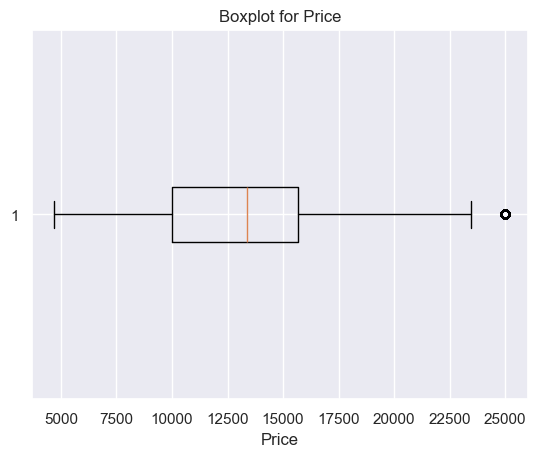

In [845]:
# Finding outliers in the price feature
plt.boxplot(final_df['Price'], vert=False)
plt.xlabel('Price')
plt.title('Boxplot for Price')
plt.show()

In [846]:
print(final_df['Price'].nlargest(5))

30     24999.0
70     24999.0
110    24999.0
150    24999.0
190    24999.0
Name: Price, dtype: float64


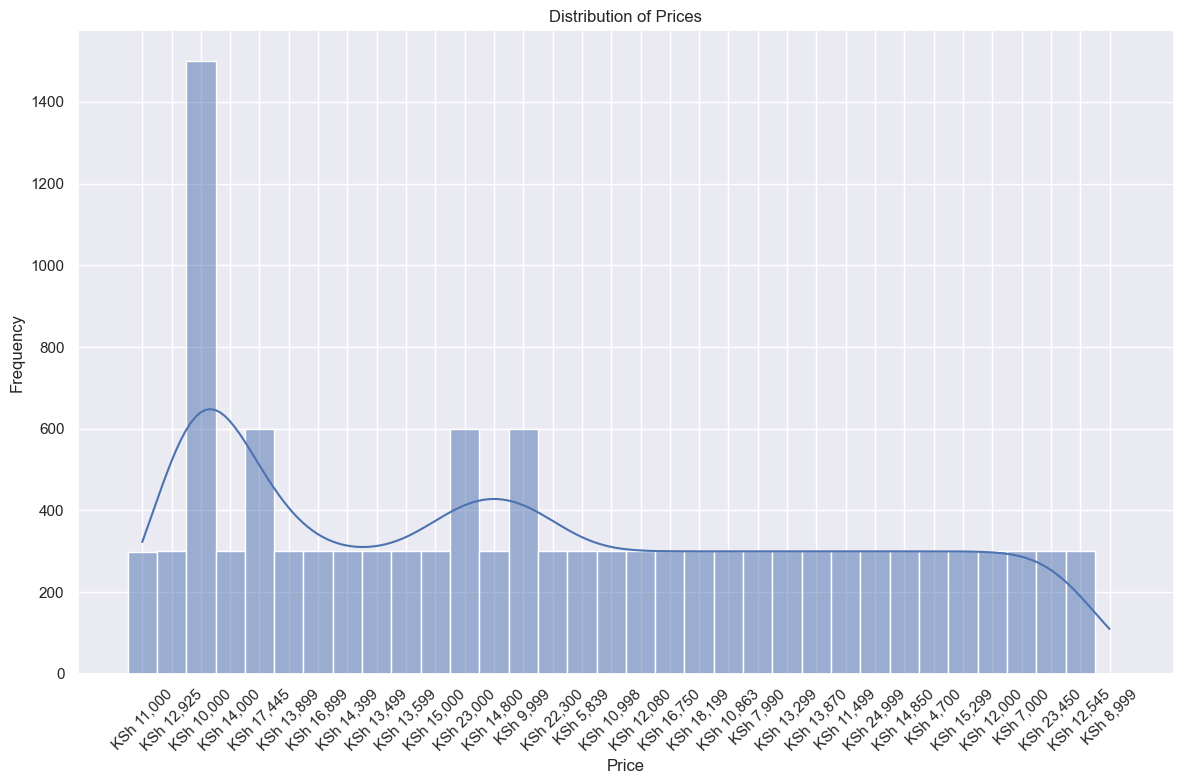

In [847]:
# Visualization of the distribution of Price data from the DataFrame
plt.figure(figsize=(12, 8))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Automatically adjust layout to prevent clipping
plt.tight_layout()
# Show the plot
plt.show()

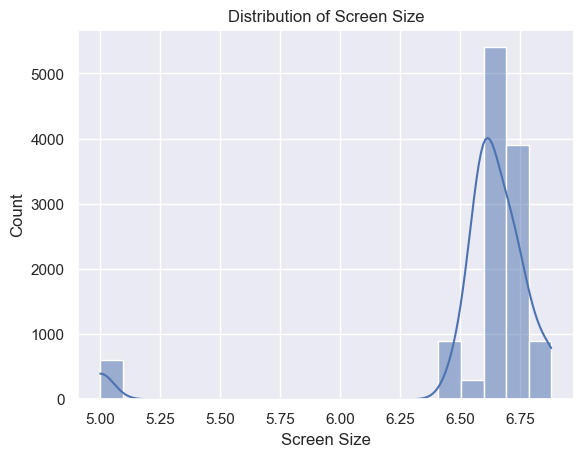

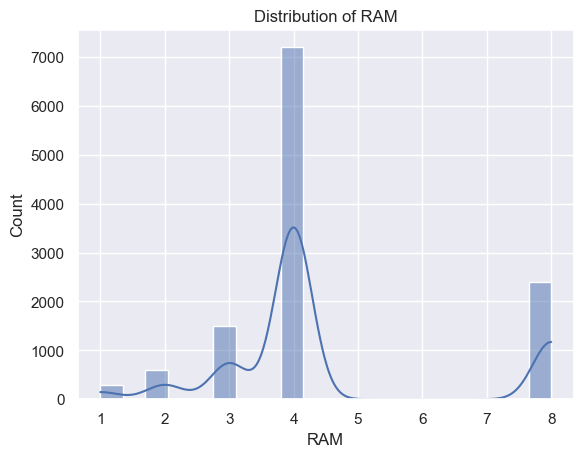

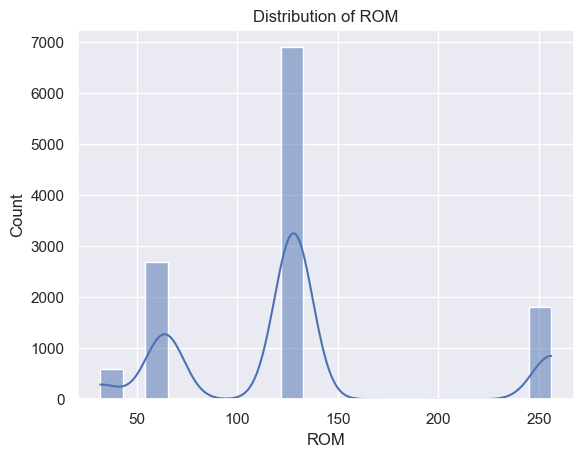

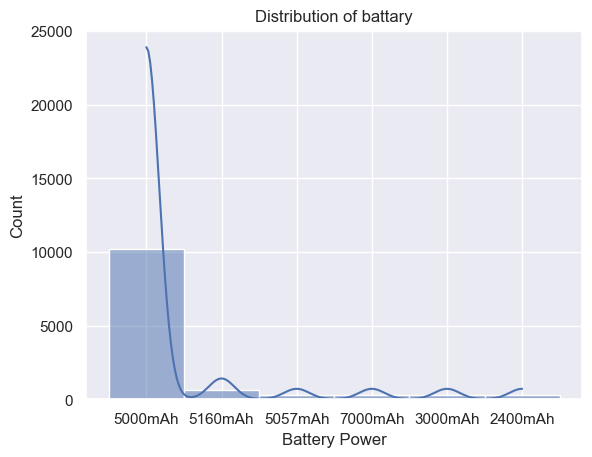

In [848]:
# Plotting histograms with Kernel Density Estimation (KDE) for different features in final_df
sns.histplot(final_df['Screen Size'], bins=20, kde=True)
plt.title('Distribution of Screen Size')
plt.show()
# Histogram for 'RAM' with 20 bins and KDE overlay
sns.histplot(final_df['RAM'], bins=20, kde=True)
plt.title('Distribution of RAM')
plt.show()
# Histogram for 'ROM' with 20 bins and KDE overlay
sns.histplot(final_df['ROM'], bins=20, kde=True)
plt.title('Distribution of ROM')
plt.show()
# Histogram for 'Battery Power' with 20 bins and KDE overlay
sns.histplot(final_df['Battery Power'], bins=20, kde=True)
plt.title('Distribution of battary')
plt.show()

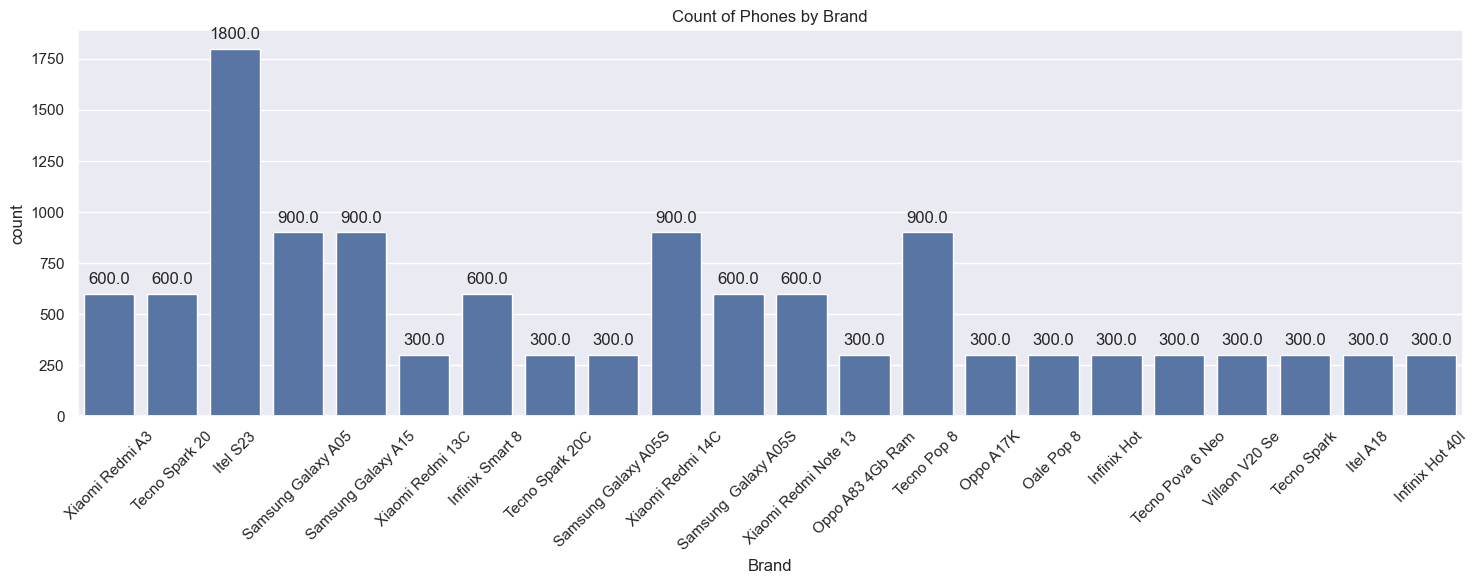

In [849]:
# Plotting a count plot of phone brands in final_df with annotations and rotated labels for better readability
# Set figure size for the plot
plt.figure(figsize=(15, 6))
# Count plot for 'Brand' column in the dataset
ax1 = sns.countplot(x='Brand', data=final_df)
plt.title('Count of Phones by Brand')
# Annotate each bar with its corresponding count value
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Automatically adjust layout to prevent clipping
plt.tight_layout()
plt.show()

In [850]:
final_df.dtypes


Brand                 object
Screen Size          float64
RAM                    int32
ROM                    int32
Color                 object
Warranty               int64
Camera                object
Battery Power         object
Number of SIMs         int64
Price                float64
Old Price            float64
Discount             float64
Rating               float64
Number of Reviews      int32
Search Ranking        object
Page                   int32
Rank                   int32
dtype: object

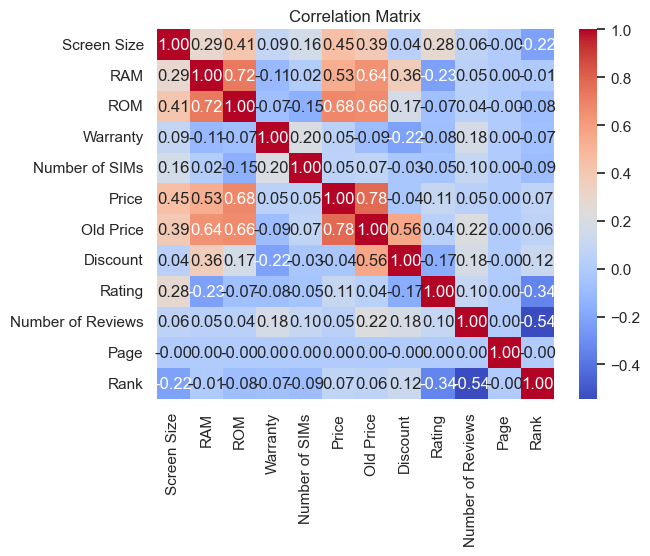

In [851]:
# Correlation matrix
final_df_numeric = final_df.select_dtypes(include=[float, int])
correlation_matrix = final_df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [852]:
final_df_numeric.corr()['Price'].sort_values(ascending=False)

Price                1.000000
Old Price            0.778953
ROM                  0.676142
RAM                  0.533064
Screen Size          0.446941
Rating               0.106853
Rank                 0.071768
Number of SIMs       0.053894
Warranty             0.049099
Number of Reviews    0.045858
Page                 0.000060
Discount            -0.037581
Name: Price, dtype: float64

### Observations

Based on the dataset, **Old Price**, **ROM**, and **RAM** are the primary factors influencing price, showing strong positive correlations with it. Specifically, **Old Price** has the highest correlation, followed by **ROM** and **RAM**. Other features, such as **Screen Size**, **Rating**, and **Rank**, show weaker or minimal correlations, suggesting they have a less significant impact on pricing. Features like **Number of Reviews**, **Discount**, and **Page** exhibit very weak or even negative correlations with price, indicating that they are not effective for pricing strategy or analysis.

## Price Analysis

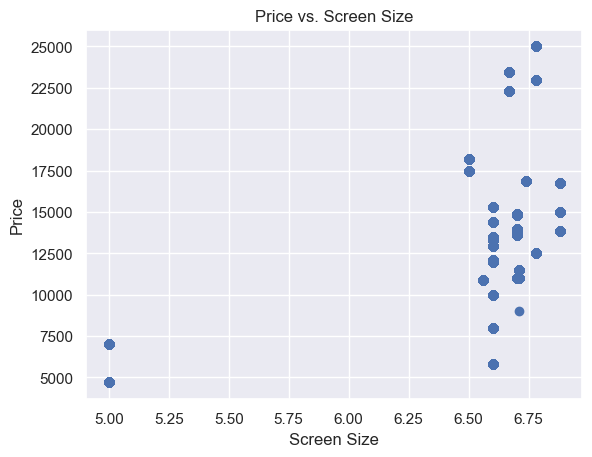

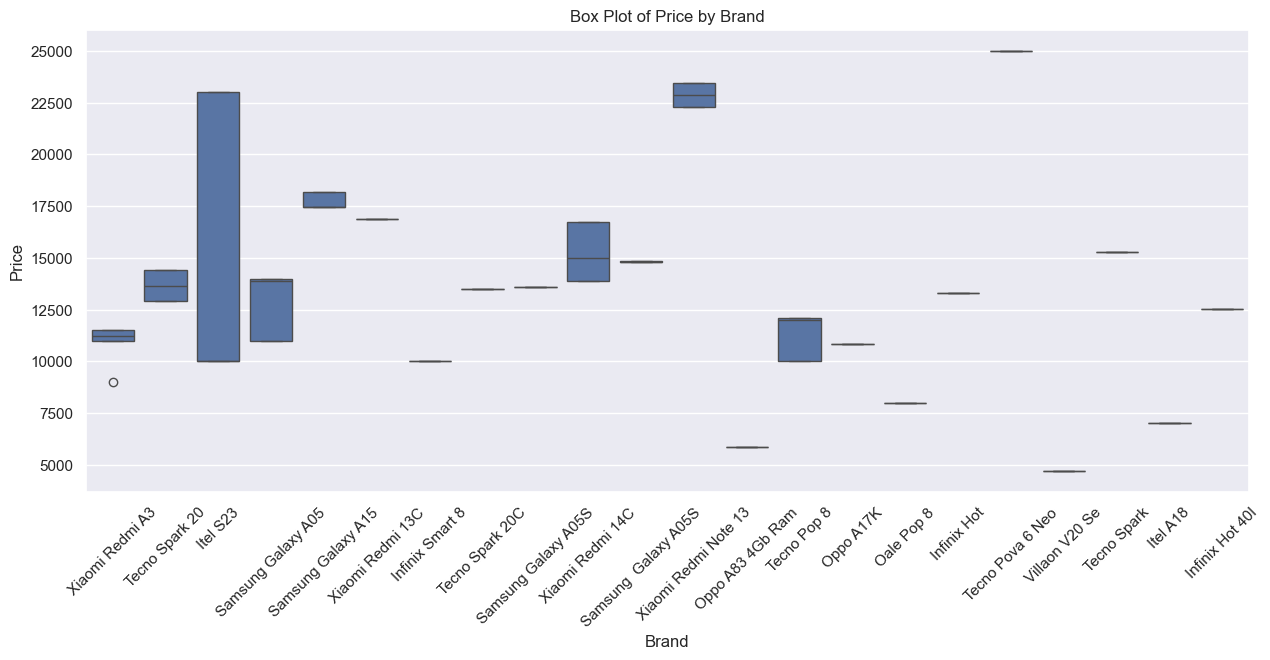

In [853]:
# Scatter plot of Current price vs. Screen Size
plt.scatter(final_df['Screen Size'], final_df['Price'])
plt.title('Price vs. Screen Size')
plt.xlabel('Screen Size')
plt.ylabel('Price')
plt.show()

# Box plot for current price by Brand
plt.figure(figsize=(15, 6))
sns.boxplot(x='Brand', y='Price', data=final_df)
plt.title('Box Plot of Price by Brand')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Automatically adjust layout to prevent clipping
plt.show()

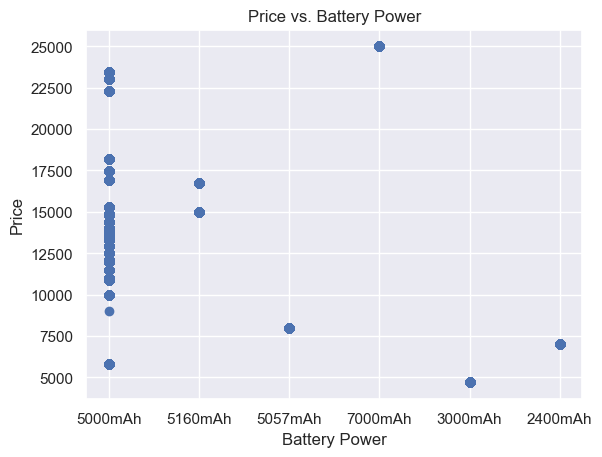

In [854]:
# Scatter plot to visualize the relationship between Battery Power and Price
plt.scatter(final_df['Battery Power'], final_df['Price'])
# Set the title of the plot to describe what it shows
plt.title('Price vs. Battery Power')
# Label the x-axis as Battery Power
plt.xlabel('Battery Power')
# Label the y-axis as Price
plt.ylabel('Price')
# Display the plot
plt.show()

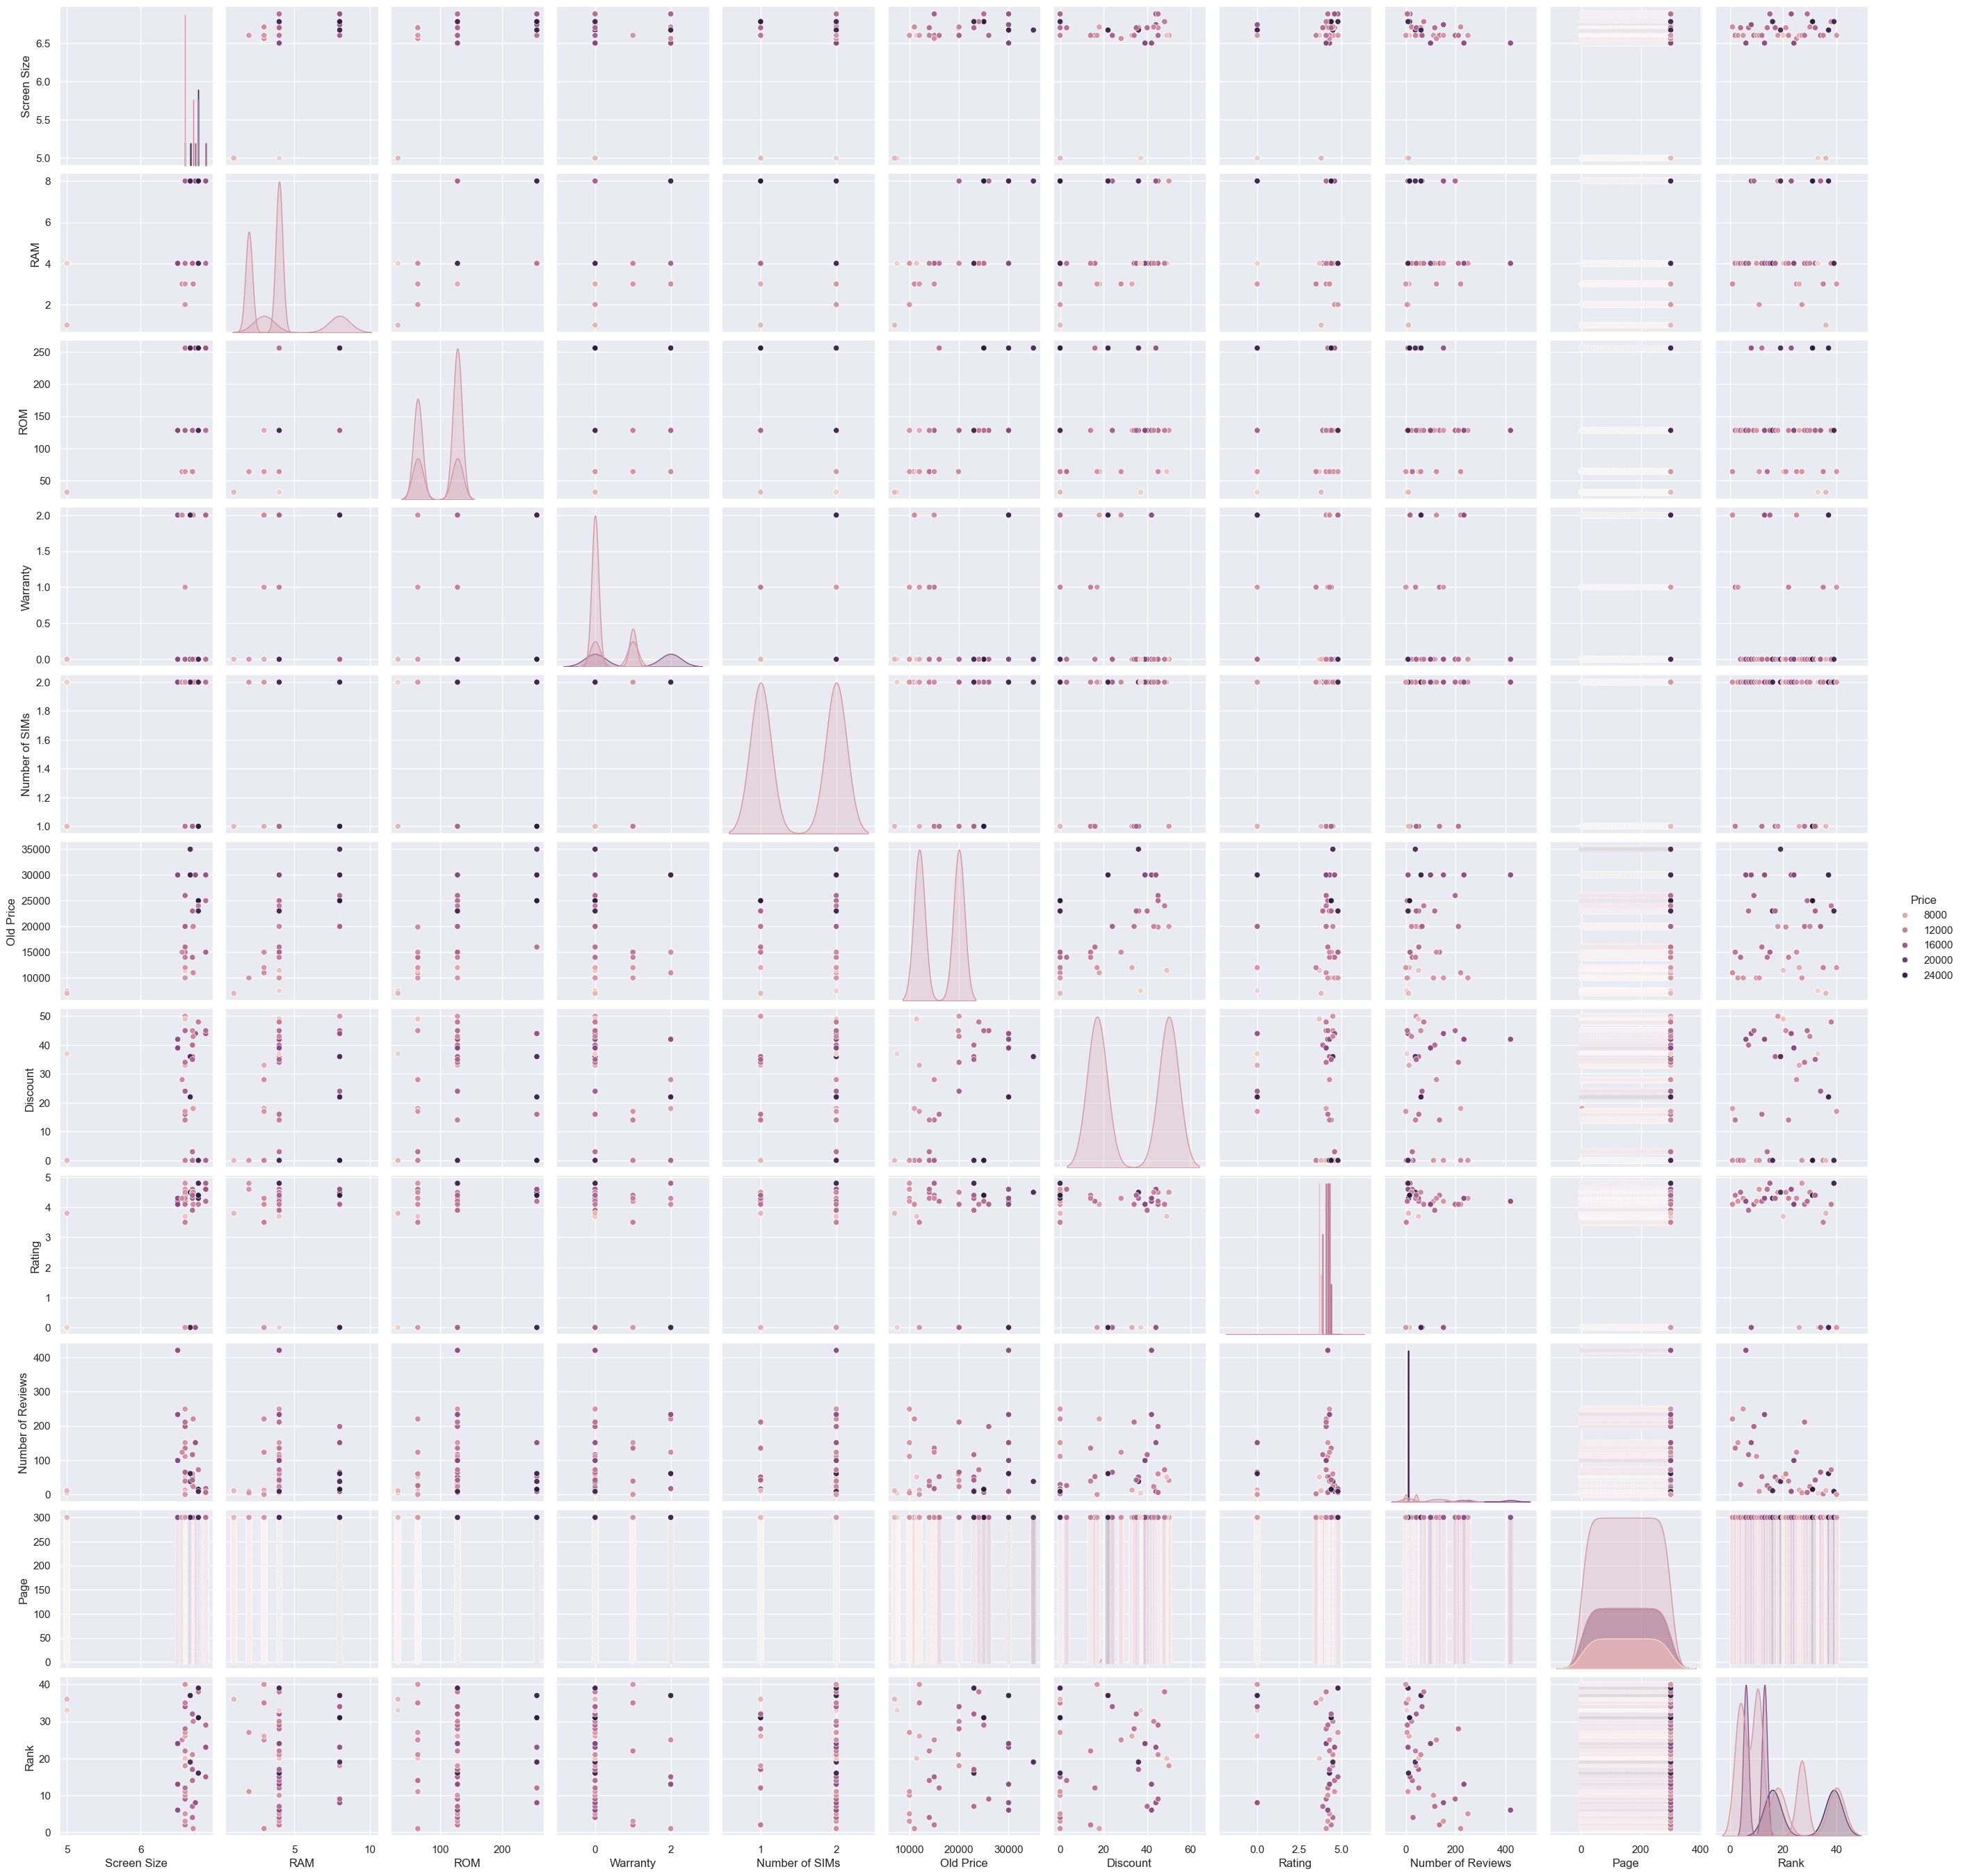

In [855]:
# #Pairplot visualizes relationships between numerical features
# Points are colored based on 'Price' to differentiate price levels
sns.pairplot(final_df,hue='Price')
plt.show()

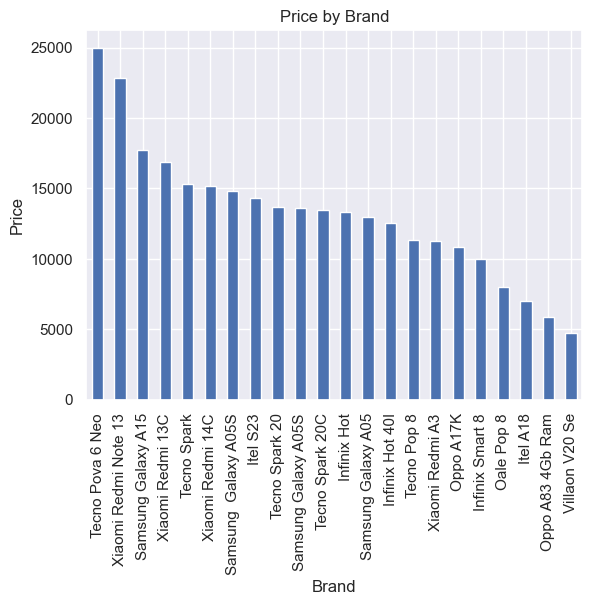

In [856]:
# Group by Brand, calculate average Price, and sort in descending order
brand_price = final_df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
# Bar plot to visualize the average price for each brand
brand_price.plot(kind='bar')
# Set the title for the plot
plt.title('Price by Brand')
# Label the y-axis as Price
plt.ylabel('Price')
# Display the plot
plt.show()

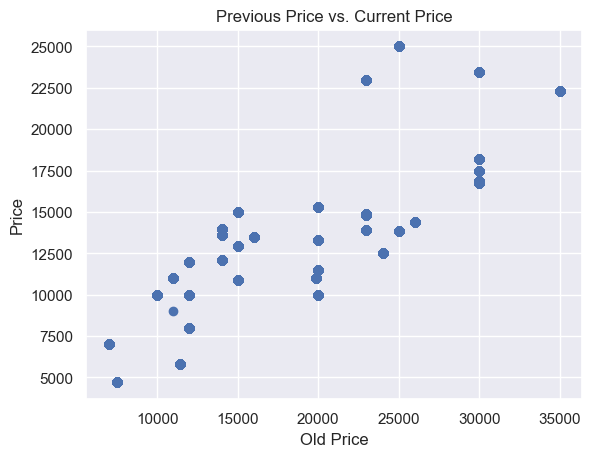

In [857]:
# Old Price vs Current Price
plt.scatter(final_df['Old Price'], final_df['Price'])
plt.title('Previous Price vs. Current Price')
plt.xlabel('Old Price')
plt.ylabel('Price')
plt.show()

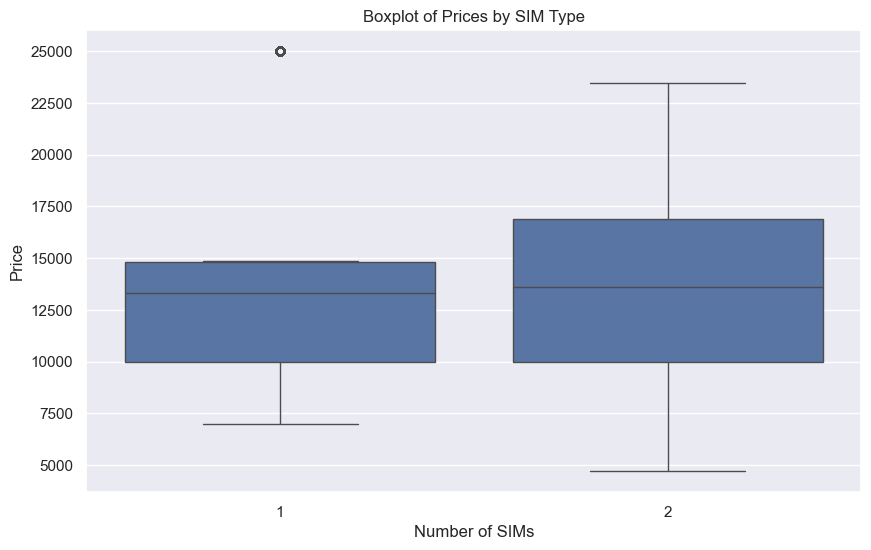

In [858]:
# Set the figure size for better visibility of the plot
plt.figure(figsize=(10, 6))
# Create a boxplot to show the distribution of Price across different SIM types
sns.boxplot(x='Number of SIMs', y='Price', data=final_df)
# Set the title for the plot
plt.title('Boxplot of Prices by SIM Type')
# Display the plot
plt.show()

## Features Selection and Model Building

In [859]:
# DataPreprocessing #FeatureSelection #PredictiveModeling
X = final_df[['Old Price', 'RAM', 'ROM','Screen Size', 'Rating']]
# Target variable (output variable)
y = final_df['Price']

In [860]:
y.value_counts()

Price
10000.0    1500
17445.0     600
9999.0      600
23000.0     600
12080.0     300
11499.0     300
10863.0     300
7990.0      300
13299.0     300
13870.0     300
24999.0     300
16750.0     300
14850.0     300
4700.0      300
15299.0     300
12000.0     300
7000.0      300
18199.0     300
10998.0     300
12925.0     300
12545.0     300
5839.0      300
22300.0     300
14800.0     300
15000.0     300
13599.0     300
13499.0     300
14399.0     300
16899.0     300
13899.0     300
14000.0     300
23450.0     300
11000.0     299
8999.0        1
Name: count, dtype: int64

In [861]:
# Remove rows where 'Price' is 8999.0 (the class with only 1 sample)
X_filtered = X[y != 8999.0]
y_filtered = y[y != 8999.0]

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, stratify=y_filtered, random_state=42, test_size=0.2)

# Print the size of the training and test sets
print(f"Training size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Training size: 9599
Test size: 2400
